In [15]:
%matplotlib inline
import os  # interact with the filesystem
import urllib.request  # grad data from internet
import zipfile

import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib

In [29]:
def download_zip(url, zip_fname, base_path, rm_zip=False):
    zip_file = os.path.join(base_path, zip_fname)
    u = urllib.request.urlopen(url)
    data = u.read()
    u.close()
    
    # write tar data to file
    with open(zip_file, "wb") as f:
        f.write(data)

    # extract the data
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(base_path)

    if rm_zip:
        os.remove(zip_file)


In [30]:
data_dir = os.path.join(os.getcwd(), "data")
url = "http://download.alleninstitute.org/informatics-archive/current-release/mouse_annotation/E18pt5_atlasVolume.zip"
download_zip(url, "E18pt5_atlasVolume.zip", data_dir)

In [5]:
os.listdir("data/atlasVolume")

['atlasVolume.mhd', 'atlasVolume.raw']

In [11]:
hdr_file = os.path.join(data_dir, "atlasVolume", "atlasVolume.mhd")
img = io.imread(hdr_file, plugin='simpleitk')

In [14]:
img.shape

(278, 370, 581)

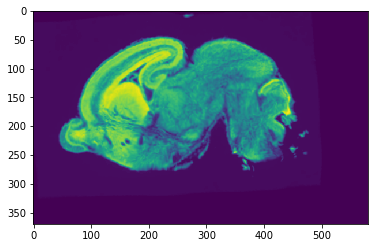

In [162]:
plt.imshow(img[92,:,:])

In [32]:
url2 = "http://download.alleninstitute.org/informatics-archive/current-release/mouse_annotation/E18pt5_DevMouse2012_annotation.zip"
download_zip(url2, "E18pt5_DevMouse2012_annotation.zip", data_dir)

In [33]:
annot_hdr = os.path.join(data_dir, "annotation.mhd")
img_annot = io.imread(annot_hdr, plugin='simpleitk')

In [34]:
img_annot.shape

(278, 370, 581)

In [167]:
np.unique(img).shape

(241,)

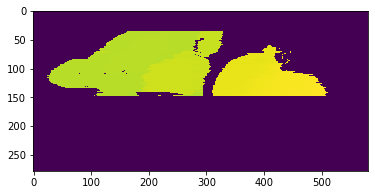

In [157]:
plt.imshow(img_annot[:,200,:])

In [37]:
type(img_annot)

numpy.ndarray

In [42]:
brain_voxels = np.count_nonzero(img_annot)

In [45]:
# unit is microns
voxel_dimensions_mi = (16.0, 16.0, 20.0)
# unit in mm
voxel_dimensions_mm = tuple([x / 1000 for x in voxel_dimensions_mi])
voxel_volume = voxel_dimensions_mm[0] * voxel_dimensions_mm[1] * voxel_dimensions_mm[2]

In [46]:
voxel_volume

5.12e-06

In [47]:
brain_volume = brain_voxels * voxel_volume
# units im milimeters
print(brain_volume)

31.22688


In [172]:
hist, bins = np.histogram(img, bins=np.unique(img))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

(array([0., 4., 6., 6., 2., 1., 2., 1., 2., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

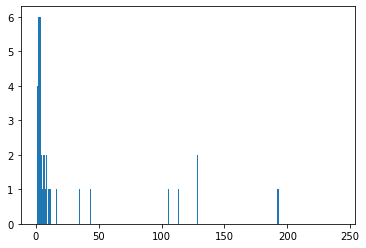

In [173]:
plt.hist(hist, bins=bins)

In [68]:
np.count_nonzero(img)

36135247

In [69]:
np.histogram(img)

(array([45581008,   828526,  1349011,  2692034,  3557181,  3130684,
         1848145,   743815,    31185,       71]),
 array([  0. ,  24.2,  48.4,  72.6,  96.8, 121. , 145.2, 169.4, 193.6,
        217.8, 242. ]))

In [72]:
hist, _ = np.histogram(img)

(array([9., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([7.10000000e+01, 4.55816470e+06, 9.11625840e+06, 1.36743521e+07,
        1.82324458e+07, 2.27905395e+07, 2.73486332e+07, 3.19067269e+07,
        3.64648206e+07, 4.10229143e+07, 4.55810080e+07]),
 <a list of 10 Patch objects>)

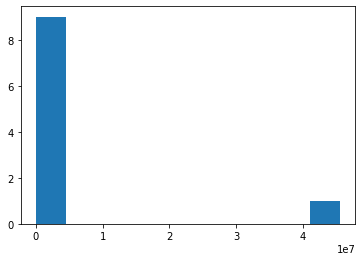

In [73]:
plt.hist(hist)

ValueError: object too deep for desired array

In [85]:
np.count_nonzero(img[img > 9])

14986815

In [86]:
import numpy.ma as ma

In [147]:
mask_img = ma.masked_array(img, mask=img > 10, fill_value=0)

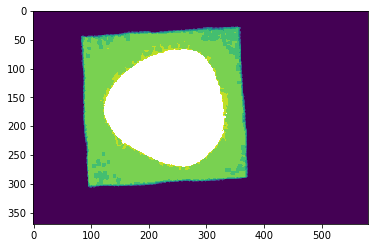

In [163]:
plt.imshow(mask_img[50,:,:])

In [150]:
mask = ma.getmask(mask_img)

In [152]:
brain_voxels = np.count_nonzero(mask)

In [153]:
brain_volume = brain_voxels * voxel_volume

In [154]:
brain_volume

75.95731968